### Plot Fig2bc

In [1]:
import pygplates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap

%matplotlib inline

########################################
# Matthews2016 model
# Import the lithologic data of Matthews2016
point_feature_filename = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Matthews2016_410-0Ma/CEG/PresentDay_LithData_Matthews2016_CEG_410-0Ma_ToAgeCorrected_CookCut_DeleteDataUsingStartAge.shp'
input_feature_collection = pygplates.FeatureCollection(point_feature_filename)

#Rotation:Global_EB_410-0Ma_GK07_Matthews_etal_PMAG_fixed_crossovers.rot
input_rotation_filename_Matthews2016PMAG_fixed = ['/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/Global_EB_410-0Ma_GK07_Matthews_etal_PMAG_fixed_crossovers.rot']
rotation_model = pygplates.RotationModel(input_rotation_filename_Matthews2016PMAG_fixed)

########################################
# Scotess2008 model
#point_feature_filename = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Scotese_410-0Ma/CEG/PresentDay_LithData_Scotese_CEG_410-0Ma_Integrated/PresentDay_CEG_Scotese2008_410-0Ma_AddStartAgeEndAge_CookCut.shp'
#input_feature_collection = pygplates.FeatureCollection(point_feature_filename)

#input_rotation_filename_Scotese2008 = ['/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/PALEOMAP_PlateModel.rot']
#rotation_model = pygplates.RotationModel(input_rotation_filename_Scotese2008)


########################################
# Golonka model
#point_feature_filename = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Golonka_410-0Ma/PresentDay_CEG_Golonka_410-0Ma_CookedCut_InvalidDataDeletedUsingStartAge.shp'
#input_feature_collection = pygplates.FeatureCollection(point_feature_filename)
#continental_polygons = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/Golonka_Phanerozoic_Plate_Motions_GPlates/Phanerozoic_EarthByte_ContinentalRegions.gpml'

#input_rotation_filename_Golonka = ['/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/Golonka_Phanerozoic_Plate_Motions_GPlates/Phanerozoic_EarthByte.rot']
#rotation_model = pygplates.RotationModel(input_rotation_filename_Golonka)

In [2]:
def get_paleolithology(point_features,rotation_model):
    pX = []
    pY = []
    pAge = []
    for point in point_features:
        lithcode = point.get_shapefile_attribute('LithCode')
        if lithcode == 'C' and point.get_reconstruction_plate_id()!=0:
        #if lithcode == 'E' and point.get_reconstruction_plate_id()!=0:
        #if lithcode== 'T' or lithcode=='D' or lithcode=='G' and point.get_reconstruction_plate_id()!=0:
            BirthTime = np.median(point.get_valid_time())
            if BirthTime<410:
                pAge.append(BirthTime)
                point_rotation = rotation_model.get_rotation(BirthTime, point.get_reconstruction_plate_id(), anchor_plate_id=0) #obtain rotating rules
                reconstructed_point = point_rotation * point.get_geometry() # carry out reconstruction
                pX.append(reconstructed_point.to_lat_lon()[1])
                pY.append(reconstructed_point.to_lat_lon()[0])         
    return pX,pY,pAge

In [3]:
age_range_list = [(419,393),   # Early Devonian
           (393,388),   # Middle Devonian (Eifelian)
           (388,383),   # Middle Devonian (Givetian)
           (383,359),   # Late Devonian
           (359,331),   # Early Carboniferous (Tournaisian-Visean)
           (331,323),   # Early Carboniferous (Serpukhovian)
           (323,307),   # Late Carboniferous (Bashkirian-Moscovian)
           (307,299),   # Late Carboniferous (Kasimovian-Gzhelian)
           (299,290),   # Early Permian (Asselian-Sakmarian)
           (290,252),   # Middle-Late Permian (Artinskian-Lopingian)
           (252,247),   # Early Triassic
           (247,237),   # Middle Triassic
           (237,201),   # Late Triassic
           (201,164),   # Early and Middle Jurassic
           (164,145),   # Late Jurassic
           (145,113),   # Early Cretaceous (Berriasian-Aptian)
           (113,89.8),   # Late Cretaceous (Albian-Turonian)
           (89.8,66.0),   # Late Cretaceous (Coniacian-Maastrichtian)
           (66.0,56.0),   # Paleocene
           (56.0,47.8),  # Early Eocene (Ypresian?)
           (47.8,33.9),  # Middle and Late Eocene
           (33.9,23.0),  # Oligocene
           (23.0,5.3),    # Miocene
           (0.01,-0.01)]
#print age_range_list[5:]

i = 0
for i in np.arange(0,24,1):
    recon_time = np.mean(age_range_list[i])
    print recon_time

406.0
390.5
385.5
371.0
345.0
327.0
315.0
303.0
294.5
271.0
249.5
242.0
219.0
182.5
154.5
129.0
101.4
77.9
61.0
51.9
40.85
28.45
14.15
0.0


In [4]:
# reconstruct all data and get their x, y coordinates and ages
pX,pY,pAge = get_paleolithology(input_feature_collection,rotation_model)
#print len(pX)
#print pAge


for j in np.arange(0,24,1):
    n = 0
    for i in np.arange(0,len(pAge),1):
        if np.array(pAge[i]) == np.mean(age_range_list[j]):
            n = n+1
            #print np.array(pAge[i])
            #print np.mean(age_range_list[j])
    print n

3
4
11
26
189
99
291
268
298
334
19
21
228
478
86
244
162
160
116
168
233
180
384
1352


In [5]:
# remove the sampling bias

result_original = []
result_SamplingBiasRemoved = []
result_flipped = []
result_doubled = []

for i in np.arange(0,24,1):
    
    result = []
    result_0 = []
    result_1 = []
    result_2 = []
    result_3 = []
    
    index = np.where(np.array(pAge) == np.mean(age_range_list[i]))
    #print np.mean(age_range_list[i]),np.array(pAge)[index]
    
    xedges = np.arange(-180, 181, 5) #180, longtitude
    yedges = np.arange(-90, 91, 5) #90, latitude, specify the bin size
    data_hist = np.histogram2d(np.array(pX)[index],np.array(pY)[index], bins=(xedges, yedges))
    result_0 = np.nansum(data_hist[0], axis=0)
    result_original.append(result_0)
    #print type(result_original)
    
    # save the original data
    #df = pd.DataFrame(data_hist[0].T)
    #writer = pd.ExcelWriter('OriginalData_Glacial_%sMa.xlsx' % np.mean(age_range_list[i]), engine='xlsxwriter') # Evaporite
    #df.to_excel(writer, sheet_name='Sheet1')
    #writer.save()
    
    # remove the sampling bias
    result_1 = np.nansum(data_hist[0]/data_hist[0], axis=0)
    result_SamplingBiasRemoved.append(result_1)
    
    #plt.pcolor(xedges,yedges,data_hist[0].T) #T means reverse the x, y axis
    
    # flip the data
    result_2 = np.flipud(result_1[:18])+result_1[18:]
    result_flipped.append(result_2) # add data on south hemisphere to north hemishpere
    #print result_flipped
    
    # double the data
    result_3 = list(np.flipud(result_2)) + list(result_2) 
    result_doubled.append(np.array(result_3)) # add data on south hemisphere to north hemishpere
    #print result_doubled

/Users/wenchaocao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in divide


In [6]:
print xedges
print yedges

[-180 -175 -170 -165 -160 -155 -150 -145 -140 -135 -130 -125 -120 -115 -110
 -105 -100  -95  -90  -85  -80  -75  -70  -65  -60  -55  -50  -45  -40  -35
  -30  -25  -20  -15  -10   -5    0    5   10   15   20   25   30   35   40
   45   50   55   60   65   70   75   80   85   90   95  100  105  110  115
  120  125  130  135  140  145  150  155  160  165  170  175  180]
[-90 -85 -80 -75 -70 -65 -60 -55 -50 -45 -40 -35 -30 -25 -20 -15 -10  -5
   0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90]


(37, 73)
(37, 73)
(73,)
(37,)
(36, 72)


/Users/wenchaocao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


nan


/Users/wenchaocao/anaconda/lib/python2.7/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


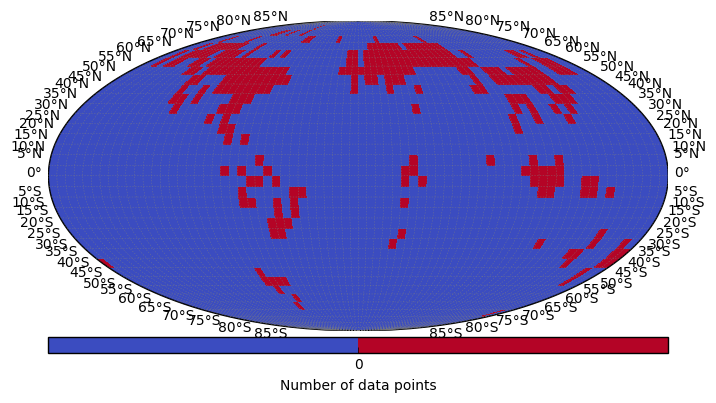

In [7]:
fig = plt.figure(figsize=(8,6))

m = Basemap(projection='moll',lat_0=0,lon_0=0,resolution='c',suppress_ticks=True)

# ishow
#m.imshow(data_hist[0].T)
xedges = np.arange(-180,181,5)
yedges = np.arange(-90,91,5)

px,py = np.meshgrid(xedges,yedges)
print py.shape
print px.shape

# pcolor or pcolormesh (they are same)
data = (data_hist[0]/data_hist[0]).T
cmap =plt.get_cmap('coolwarm',2) # jet, coolwarm, bwr
m.pcolormesh(px,py,data,latlon=True,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5) #T means reverse the x, y axis

# pcolor or pcolormesh on a basemap
#x,y = m(np.asarray(xedges),np.asarray(yedges))
print xedges.shape # longitude
print yedges.shape # latitude
print (data_hist[0].T).shape

#x,y = m(xedges,yedges)

#m.pcolormesh(lon,lat,data_hist[0].T, latlon=True)


m.drawparallels(np.arange(-90, 91., 5.), labels=[1, 1, 0, 0],
                dashes=[1, 1], linewidth=0.25, color='0.5')
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 1, 1],
                dashes=[1, 1], linewidth=0.25, color='0.5')

print np.min(data)
print np.max(data)
cb = m.colorbar(location='bottom', label="Number of data points")
cb.set_ticks([0,1])

#plt.savefig('Fig2c.png',dpi=1000)
#plt.savefig('Fig2c_new2.pdf',dpi=600)

(37, 73)
(37, 73)
(73,)
(37,)
(36, 72)
24.0


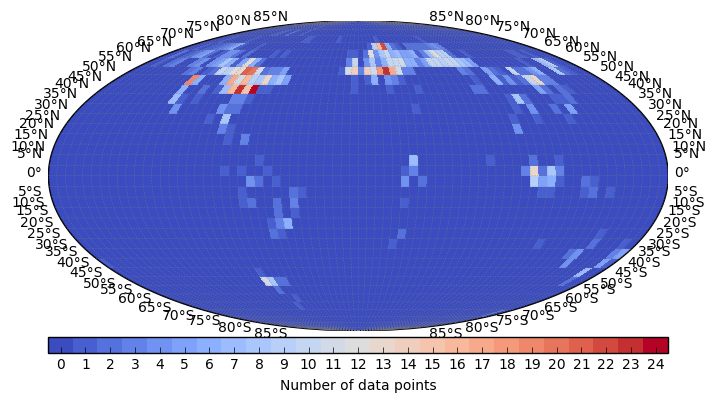

In [8]:
fig = plt.figure(figsize=(8,6))

m = Basemap(projection='moll',lat_0=0,lon_0=0,resolution='c',suppress_ticks=True)

# ishow
#m.imshow(data_hist[0].T)
xedges = np.arange(-180,181,5)
yedges = np.arange(-90,91,5)

px,py = np.meshgrid(xedges,yedges)
print py.shape
print px.shape

# pcolor or pcolormesh (they are same)
data = data_hist[0].T
cmap =plt.get_cmap('coolwarm', np.max(data)-np.min(data)+1) #binary, coolwarm, bwr
m.pcolormesh(px,py,data,latlon=True,cmap=cmap,vmin = np.min(data)-.5, vmax = np.max(data)+.5) #T means reverse the x, y axis

# pcolor or pcolormesh on a basemap
#x,y = m(np.asarray(xedges),np.asarray(yedges))
print xedges.shape # longitude
print yedges.shape # latitude
print (data_hist[0].T).shape

#x,y = m(xedges,yedges)

#m.pcolormesh(lon,lat,data_hist[0].T, latlon=True)


m.drawparallels(np.arange(-90, 91., 5.), labels=[1, 1, 0, 0],
                dashes=[1, 1], linewidth=0.25, color='0.5')
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0, 0, 1, 1],
                dashes=[1, 1], linewidth=0.25, color='0.5')

print np.min(data)
print np.max(data)
cb = m.colorbar(location='bottom', label="Number of data points",ticks=np.arange(np.min(data),np.max(data)+1))

#plt.savefig('Fig2b.png',dpi=1000)
#plt.savefig('Fig2b_new3.pdf',dpi=600)